In [1]:
!pip install lightgbm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# Reading the datasets

In [2]:
train=pd.read_excel('Data_Train.xlsx')

In [3]:
train.head(5)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [64]:
print("Train Dataset Shape :", train.shape)
train.head(3)

Train Dataset Shape : (147443, 15)


,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6


In [5]:
train.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

In [6]:
test = pd.read_excel('Data_Test.xlsx')

In [65]:
test.head(5)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc
0,47571900570810,19-03-2014,34218,2354,2185,GROCERY STORE,17352,id-11235901,id_1890134,81864.0,CANVASS,19.0,Low,locid1145
1,19685766253655,22-11-2010,24597,13183,12516,SCHOOL,15536,id-11235901,id_1890134,81871.0,CANVASS,32.0,High,locid16450
2,37885701847801,09-06-2014,1779,26434,25220,RESTAURANT,8849,id-11235901,id_1890134,81902.0,CANVASS,NaN,High,locid12916
3,39946284936679,07-04-2010,8541,16246,16384,SCHOOL,11663,id-11235901,id_1890134,81869.0,CANVASS,NaN,High,locid7292
4,46793577796409,25-07-2010,35194,20114,19225,RESTAURANT,16286,id-11235901,id_1890134,81874.0,CANVASS RE-INSPECTION,32.0,High,locid2048


In [66]:
print("Test Dataset Shape :", test.shape)
train.head(3)

Test Dataset Shape : (49148, 14)


,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6


In [9]:
ID_COL, TARGET_COL = 'ID', 'Inspection_Results'
df = pd.concat([train, test]).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
train.shape, test.shape

((147443, 15), (49148, 14))

In [11]:
train.Inspection_Results.value_counts()

4    79453
1    28456
5    20631
6    12691
3     4747
2     1420
0       45
Name: Inspection_Results, dtype: int64

In [12]:
train.State.value_counts()

id_1890134    147402
id_1890135        41
Name: State, dtype: int64

In [13]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147443 non-null object
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 16.9+ MB


# checking null values

In [15]:
train.isnull().sum()

ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
dtype: int64

In [16]:
test.isnull().sum()

ID                       0
Date                     0
LicenseNo                0
FacilityID               0
FacilityName             0
Type                  1215
Street                   0
City                     0
State                    0
LocationID              15
Reason                   0
SectionViolations    12976
RiskLevel                0
Geo_Loc                  0
dtype: int64

In [17]:
print('Number of unique Reason:--', train.Reason.unique())

Number of unique Reason:-- ['CANVASS' 'COMPLAINT' 'CANVASS RE-INSPECTION' 'LICENSE'
 'LICENSE RE-INSPECTION' 'SUSPECTED FOOD POISONING' 'LICENSE-TASK FORCE'
 'TAG REMOVAL' 'COMPLAINT RE-INSPECTION' 'CONSULTATION'
 'RECENT INSPECTION' 'SHORT FORM COMPLAINT'
 'SUSPECTED FOOD POISONING RE-INSPECTION' 'COMPLAINT-FIRE'
 'OUT OF BUSINESS' 'TASK FORCE LIQUOR 1475' 'SHORT FORM FIRE-COMPLAINT']


In [18]:
print('Number of unique Type:--', train.Type.unique())

Number of unique Type:-- ['RESTAURANT' 'GROCERY STORE' "CHILDREN'S SERVICES FACILITY" 'GAS STATION'
 'SCHOOL' 'PALETERIA' 'DAYCARE ABOVE AND UNDER 2 YEARS' 'MEAT PACKING'
 'LONG TERM CARE' nan 'LIQUOR' 'DAYCARE (2 - 6 YEARS)'
 'COMMISSARY FOR SOFT SERVE ICE CREAM TRUCKS' 'CONVENIENCE STORE'
 'DAYCARE (UNDER 2 YEARS)' 'SHARED KITCHEN USER (LONG TERM)'
 'GOLDEN DINER' 'BAKERY' 'WRIGLEY ROOFTOP' 'DAYCARE COMBO 1586'
 'DAYCARE NIGHT' 'MOBILE FOOD PREPARER' 'POPCORN SHOP' 'TAVERN' 'HOSPITAL'
 'CATERING' 'PRIVATE SCHOOL' 'SHELTER' 'TAVERN GRILL'
 'MOBILE FOOD DISPENSER' 'MOBILE DESSERTS VENDOR' 'WHOLESALE'
 'SPECIAL EVENT' 'GAS STATION/RESTAURANT' 'SENIOR DAY CARE' 'DAYCARE'
 'BANQUET' 'BANQUET HALL' 'ROOFTOPS' 'SHARED KITCHEN' 'LIVE POULTRY'
 'BAR/GRILL' 'DAYCARE 2 YRS TO 12 YRS' 'RESTAURANT(PROTEIN SHAKE BAR)'
 'COFFEE SHOP' 'MOBILE PREPARED FOOD VENDOR'
 "1023 CHILDERN'S SERVICE FACILITY" 'KIOSK'
 'SHARED KITCHEN USER (SHORT TERM)' 'THEATER' 'CAFETERIA' 'BREWPUB'
 'NURSING HOME' 'CHURCH' 

In [19]:
print('Number of unique FacilityID:--', train.FacilityID.unique())

Number of unique FacilityID:-- [ 8123 12268  1112 ...  9450 11565 19326]


In [15]:
test.nunique()

ID                   49148
Date                  2454
LicenseNo            22525
FacilityID           18104
FacilityName         17326
Type                   301
Street               14164
City                     2
State                    2
LocationID              86
Reason                  17
SectionViolations       61
RiskLevel                4
Geo_Loc              13645
dtype: int64

In [16]:
train.isnull().sum()


ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
dtype: int64

# Heatmap to visualize Null values

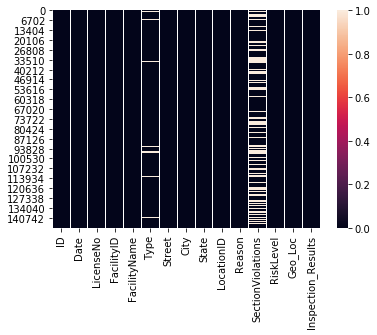

In [17]:
sns.heatmap(train.isnull())  ## Null values are present in 'Type' and 'SectionViolations' column

# Histogram of Inspection_Results

(array([4.5000e+01, 2.8456e+04, 0.0000e+00, 1.4200e+03, 0.0000e+00,
        4.7470e+03, 7.9453e+04, 0.0000e+00, 2.0631e+04, 1.2691e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

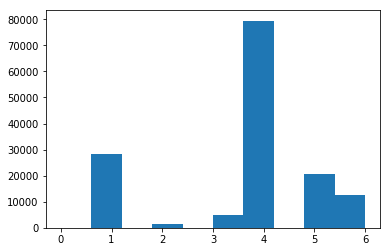

In [18]:
plt.hist(train['Inspection_Results'])

there is no pattern found in Inspection_Results


# Distplot 

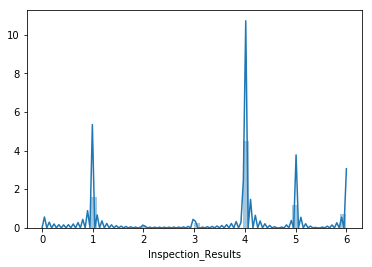

In [19]:
import seaborn as sb
sb.distplot(train['Inspection_Results'])

In [20]:
train.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

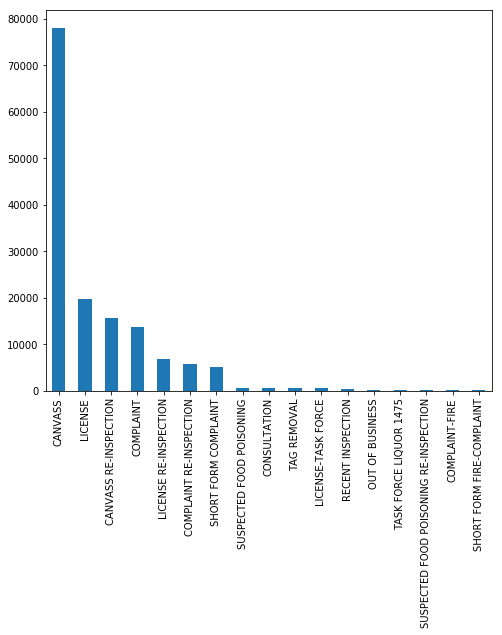

In [21]:
import seaborn as sns
plt.figure(figsize=(8,7))
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
count = train["Reason"].value_counts()
train['Reason'].value_counts().plot('bar')


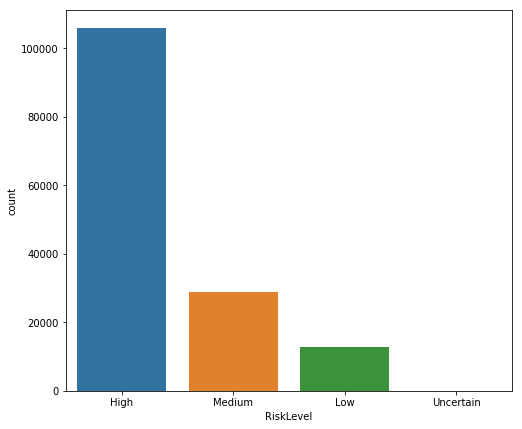

In [22]:
plt.figure(figsize=(8,7))
import seaborn as sns
sns.countplot(train['RiskLevel'])

In [23]:
train.RiskLevel.unique()

array(['High', 'Medium', 'Low', 'Uncertain'], dtype=object)

# Pie plot of column 'Risklevel'

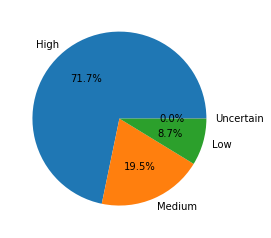

In [24]:

plt.pie(train.RiskLevel.value_counts(), labels=['High', 'Medium', 'Low', 'Uncertain'], autopct='%1.1f%%')
plt.show()

In [25]:
train.Reason.unique()

array(['CANVASS', 'COMPLAINT', 'CANVASS RE-INSPECTION', 'LICENSE',
       'LICENSE RE-INSPECTION', 'SUSPECTED FOOD POISONING',
       'LICENSE-TASK FORCE', 'TAG REMOVAL', 'COMPLAINT RE-INSPECTION',
       'CONSULTATION', 'RECENT INSPECTION', 'SHORT FORM COMPLAINT',
       'SUSPECTED FOOD POISONING RE-INSPECTION', 'COMPLAINT-FIRE',
       'OUT OF BUSINESS', 'TASK FORCE LIQUOR 1475',
       'SHORT FORM FIRE-COMPLAINT'], dtype=object)

# Pie plot of column 'Reason'

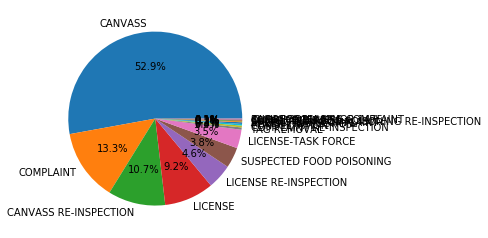

In [26]:
plt.pie(train.Reason.value_counts(), labels=['CANVASS', 'COMPLAINT', 'CANVASS RE-INSPECTION', 'LICENSE',
       'LICENSE RE-INSPECTION', 'SUSPECTED FOOD POISONING',
       'LICENSE-TASK FORCE', 'TAG REMOVAL', 'COMPLAINT RE-INSPECTION',
       'CONSULTATION', 'RECENT INSPECTION', 'SHORT FORM COMPLAINT',
       'SUSPECTED FOOD POISONING RE-INSPECTION', 'COMPLAINT-FIRE',
       'OUT OF BUSINESS', 'TASK FORCE LIQUOR 1475',
       'SHORT FORM FIRE-COMPLAINT'], autopct='%1.1f%%')
plt.show()

# Inspection Result v/s State

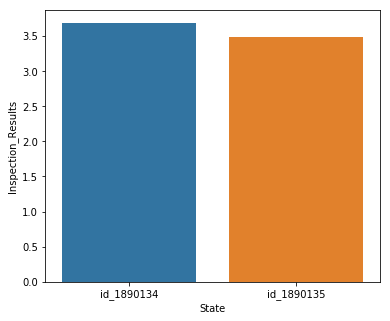

In [27]:
import seaborn as sb
plt.figure(figsize=(6,5))
y=pd.DataFrame(train.groupby(['State'])['Inspection_Results'].mean()).reset_index()
sb.barplot(y['State'],y['Inspection_Results'])

# Inspection Result v/s City

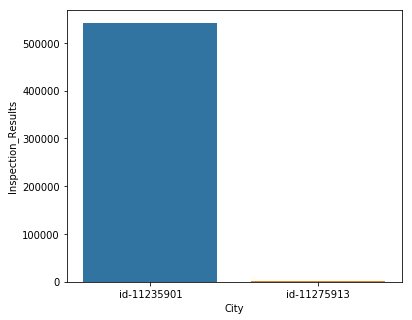

In [28]:
import seaborn as sb
plt.figure(figsize=(6,5))
y=pd.DataFrame(train.groupby(['City'])['Inspection_Results'].sum()).reset_index()
sb.barplot(y['City'],y['Inspection_Results'])

# Inspection Result v/s SectionViolations

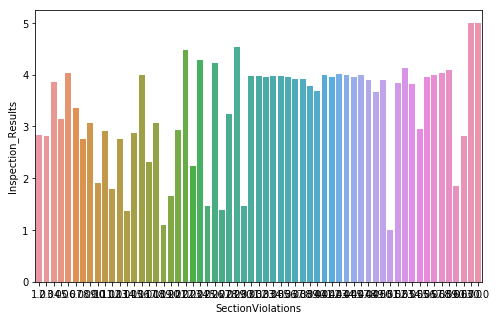

In [29]:
import seaborn as sb
plt.figure(figsize=(8,5))
y=pd.DataFrame(train.groupby(['SectionViolations'])['Inspection_Results'].mean()).reset_index()
sb.barplot(y['SectionViolations'],y['Inspection_Results'])

# Inspection Result v/s RiskLevel

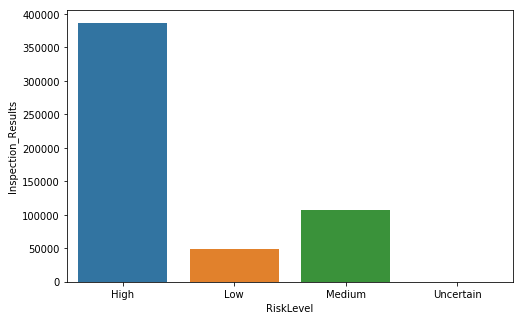

In [30]:
plt.figure(figsize=(8,5))
x=pd.DataFrame(train.groupby('RiskLevel')['Inspection_Results'].sum()).reset_index()
sb.barplot(x['RiskLevel'],x['Inspection_Results'])

# Boxplot to check outliars

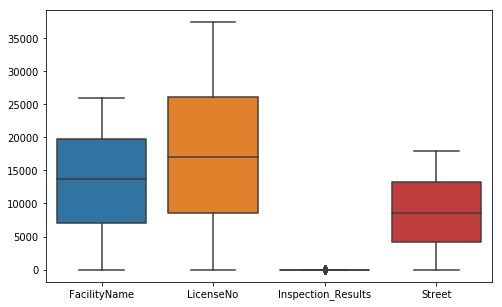

In [67]:
plt.figure(figsize=(8,5))
boxplots = sns.boxplot( data=train,order=['FacilityName','LicenseNo','Inspection_Results','Street'])

In [32]:
print(train['Inspection_Results'].describe())
#skewness and kurtosis
print("Skewness: %f" % train['Inspection_Results'].skew())
print("Kurtosis: %f" % train['Inspection_Results'].kurt())

count    147443.000000
mean          3.680405
std           1.481441
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: Inspection_Results, dtype: float64
Skewness: -0.730292
Kurtosis: -0.296022


# Count with respect to "Inspection_Results"

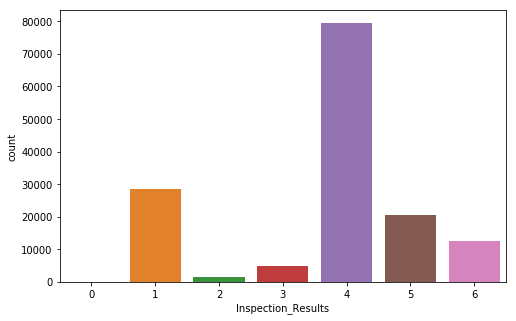

In [33]:
plt.figure(figsize=(8,5))
import seaborn as sns
sns.countplot(train['Inspection_Results'])

# Scatter plot of Inspection Result v/s RiskLevel

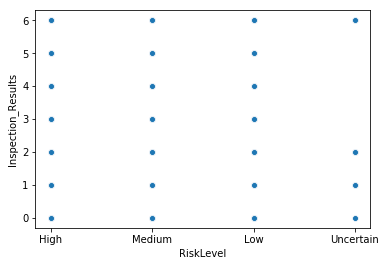

In [34]:
import seaborn as sb
sb.scatterplot(train['RiskLevel'],train['Inspection_Results'])

# Scatter plot of Inspection Result v/s Type

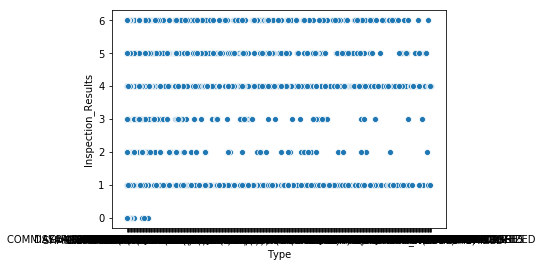

In [35]:
import seaborn as sb
sb.scatterplot(train['Type'],train['Inspection_Results'])

conclusion: no corelation found between 'Type' and 'Inspection_Results'

# Scatter plot of Inspection Result v/s Reason

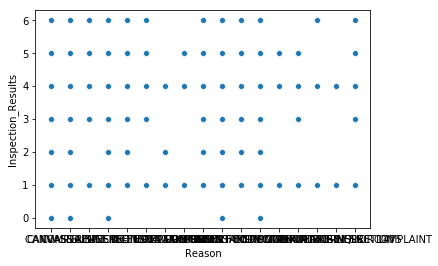

In [36]:
import seaborn as sb
sb.scatterplot(train['Reason'],train['Inspection_Results'])

conclusion: no corelation found between 'Reason' and 'Inspection_Results'

# Correlation matrix

In [37]:
train.corr()

,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
ID,1.000000,-0.001000,-0.002463,-0.002147,-0.000081,-0.000495,0.001203,-0.006987
LicenseNo,-0.001000,1.000000,0.007651,0.004446,-0.008863,-0.003506,-0.040790,-0.042021
FacilityID,-0.002463,0.007651,1.000000,0.917714,-0.017715,0.002109,0.004258,-0.004908
FacilityName,-0.002147,0.004446,0.917714,1.000000,-0.012873,0.003299,0.004225,-0.004162
Street,-0.000081,-0.008863,-0.017715,-0.012873,1.000000,0.015736,0.006610,-0.004127
LocationID,-0.000495,-0.003506,0.002109,0.003299,0.015736,1.000000,0.007259,-0.001862
SectionViolations,0.001203,-0.040790,0.004258,0.004225,0.006610,0.007259,1.000000,0.250834
Inspection_Results,-0.006987,-0.042021,-0.004908,-0.004162,-0.004127,-0.001862,0.250834,1.000000


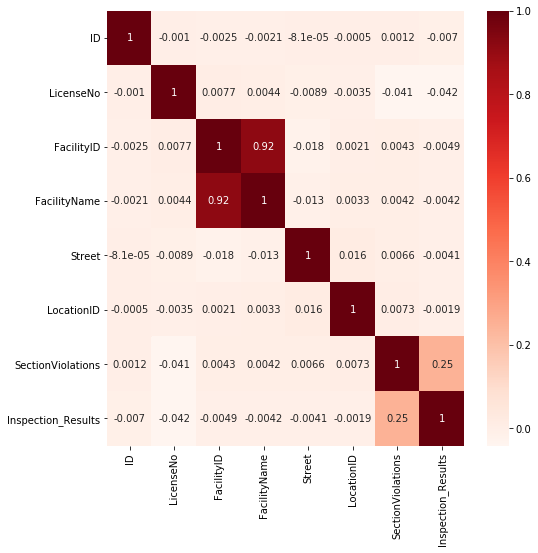

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),cmap='Reds',annot=True)

In [60]:

def get_date_features(df):
    df['Date'] = pd.to_datetime(df["Date"], format = "%d-%m-%Y", errors='coerce')
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day

get_date_features(df)


In [40]:
for c in ['FacilityID', 'FacilityName', 'LicenseNo', 'Geo_Loc']:
    temp = df.sort_values(by='Date').groupby(c)['Date'].diff(1).sort_index()
    df[f'next_Inspection_day_diff_{c}'] = temp.dt.days

In [41]:
df[['prev_Reason', 'prev_SectionViolations']] = df.sort_values(by='Date').groupby('FacilityID')[['Reason', 'SectionViolations']].shift(1).sort_index()

In [42]:
for i in range(1, 6):
    df[[f'next{i}_Reason_LicenseNo', f'next{i}_SectionViolations_LicenseNo', f'next{i}_RiskLevel_LicenseNo']] = df.sort_values(by='Date').groupby('LicenseNo')[['Reason', 'SectionViolations', 'RiskLevel']].shift(-i).sort_index()
    
for i in range(1, 6):
    df[[f'next{i}_Reason_geoloc', f'next{i}_SectionViolations_geoloc', f'next{i}_RiskLevel_geoloc']] = df.sort_values(by='Date').groupby('Geo_Loc')[['Reason', 'SectionViolations', 'RiskLevel']].shift(-i).sort_index()
    
for i in range(1, 6):
    df[[f'next{i}_Reason_id', f'next{i}_SectionViolations_id', f'next{i}_RiskLevel_id']] = df.sort_values(by='Date').groupby('FacilityID')[['Reason', 'SectionViolations', 'RiskLevel']].shift(-i).sort_index()
    
for i in range(1, 6):
    df[[f'next{i}_Reason_name', f'next{i}_SectionViolations_name', f'next{i}_RiskLevel_name']] = df.sort_values(by='Date').groupby('FacilityName')[['Reason', 'SectionViolations', 'RiskLevel']].shift(-i).sort_index()

In [43]:
df['SectionViolations_cumsum'] = df.sort_values(by='Date').groupby('FacilityID')['SectionViolations'].cumsum().shift(-1).sort_index()

In [44]:

grp = df.groupby('year').agg({'SectionViolations': ['max', 'sum', 'mean', 'min'], 'FacilityID': ['nunique' ,'size'], 'Geo_Loc': ['nunique','size'],
                              'FacilityName': ['nunique','size'], 'LocationID': ['nunique','size'], 'LicenseNo': ['nunique','size'] ,'Type': ['nunique' ,'size']})
grp.columns = ['_'.join(c).strip('_') + '_yearwise' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on ='year')

In [45]:
grp = df.groupby(['FacilityID', 'Date']).agg({'SectionViolations': ['max', 'sum', 'mean', 'min'], 'Geo_Loc': ['nunique','size'],'Reason': ['nunique', 'size'],
                                     'FacilityName': ['nunique','size'], 'LocationID': ['nunique','size'], 'LicenseNo': ['nunique','size'] ,'Type': ['nunique' ,'size']})
grp.columns = ['_'.join(c).strip('_') + '_FacilityID_and_Date_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on =['FacilityID', 'Date'])

In [46]:

grp = df.groupby(['FacilityName', 'Date']).agg({'SectionViolations': ['max', 'sum', 'mean', 'min'], 'Geo_Loc': ['nunique','size'],'Reason': ['nunique', 'size'],
                                     'FacilityID': ['nunique','size'], 'LocationID': ['nunique','size'], 'LicenseNo': ['nunique','size'] ,'Type': ['nunique' ,'size']})
grp.columns = ['_'.join(c).strip('_') + '_FacilityName_and_Date_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on =['FacilityName', 'Date'])

In [56]:
grp = df.groupby(['LicenseNo', 'Date']).agg({'SectionViolations': ['max', 'sum', 'mean', 'min'], 'Geo_Loc': ['nunique','size'],'Reason': ['nunique', 'size'],
                                     'FacilityID': ['nunique','size'], 'LocationID': ['nunique','size'], 'LicenseNo': ['nunique','size'] ,'Type': ['nunique' ,'size']})
grp.columns = ['_'.join(c).strip('_') + '_LicenseNo_and_Date_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on =['LicenseNo', 'Date'])

In [48]:
grp = df.groupby('LicenseNo').agg({'SectionViolations': ['mean'], 'FacilityID': ['nunique'],
                              'FacilityName': ['nunique'], 'LocationID': ['nunique'], 'Geo_Loc': ['nunique']})
grp.columns = ['_'.join(c).strip('_') + '_Geo_Loc_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on ='LicenseNo')

In [49]:

grp = df.groupby('FacilityID').agg({'SectionViolations': ['max'], 'Geo_Loc': ['nunique'],
                              'FacilityName': ['nunique'], 'LocationID': ['nunique'], 'LicenseNo': ['nunique']})
grp.columns = ['_'.join(c).strip('_') + '_FacilityID_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on ='FacilityID')

In [50]:

grp = df.groupby('Reason').agg({'SectionViolations': ['max'], 'FacilityID': ['nunique'], 'Geo_Loc': ['nunique'],
                              'FacilityName': ['nunique'], 'LocationID': ['nunique'], 'LicenseNo': ['nunique']})
grp.columns = ['_'.join(c).strip('_') + '_Reason_based' for c in grp.columns]
df = pd.merge(df, grp, how = 'left', on ='Reason')

In [51]:

df[f'n_days_from_start'] = (df['Date'].dt.date - df['Date'].min().date()).dt.days
df[f'n_weeks_from_start'] = (df['Date'].dt.date - df['Date'].min().date()).dt.days//7
df[f'n_days_from_end'] = (df['Date'].max().date() - df['Date'].dt.date).dt.days
df[f'n_weeks_from_end'] = (df['Date'].max().date() - df['Date'].dt.date).dt.days//7

In [52]:
from tqdm import tqdm_notebook
for c in tqdm_notebook(['FacilityID', 'FacilityName', 'LicenseNo']):
    df[f'next_inspection_day_diff_{c}'] = df.sort_values(by='Date').groupby(c)['n_days_from_start'].apply(lambda x: x - x.shift(-1))
    df[f'prev_inspection_day_diff_{c}'] = df.sort_values(by='Date').groupby(c)['n_days_from_start'].apply(lambda x: x - x.shift(1))

In [53]:

for c in tqdm_notebook(['FacilityID', 'FacilityName', 'LicenseNo']):
    df[f'next2_inspection_day_diff_{c}'] = df.sort_values(by='Date').groupby(c)['n_days_from_start'].apply(lambda x: x - x.shift(-2))
    df[f'prev2_inspection_day_diff_{c}'] = df.sort_values(by='Date').groupby(c)['n_days_from_start'].apply(lambda x: x - x.shift(2))

In [57]:
df.groupby('FacilityID')['Date']

In [58]:

df[f'n_days_from_start_fid'] = df.groupby('FacilityID')['Date'].apply(lambda x: (x - x.min()).dt.days)
df[f'n_days_from_end_fid'] = df.groupby('FacilityID')['Date'].apply(lambda x: (x.max() - x).dt.days)
df[f'n_days_from_end_lno'] = df.groupby('LicenseNo')['Date'].apply(lambda x: (x.max() - x).dt.days)
df[f'n_days_from_start_lno'] = df.groupby('LicenseNo')['Date'].apply(lambda x: (x-x.min()).dt.days)

In [59]:
df[f'n_days_from_start_fn'] = df.groupby('FacilityName')['Date'].apply(lambda x: (x - x.min()).dt.days)
df[f'n_days_from_end_fn'] = df.groupby('FacilityName')['Date'].apply(lambda x: (x.max() - x).dt.days)
df[f'n_days_from_start_geoloc'] = df.groupby('Geo_Loc')['Date'].apply(lambda x: (x - x.min()).dt.days)
df[f'n_days_from_end_geoloc'] = df.groupby('Geo_Loc')['Date'].apply(lambda x: (x.max() - x).dt.days)

In [63]:

high_cardinality_cols = ['FacilityID', 'FacilityName', 'Geo_Loc', 'LicenseNo', 'Street', 'Type', 'LocationID']
for c in tqdm_notebook(high_cardinality_cols):
    temp = pd.Series(pd.factorize(df['Date'].astype('str') + df[c].astype('str'))[0])
    temp =  temp.map(temp.value_counts())
    df[f'Date_{c}_freq'] = temp

In [64]:

cat_cols = ['City', 'Date', 'FacilityID', 'FacilityName', 'Geo_Loc', 'LicenseNo', 'LocationID', 'Reason', 'RiskLevel', 'State', 'Street', 'Type']
obj_cols = df.select_dtypes('object').columns.tolist()
cat_cols = list(set(cat_cols + obj_cols))
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [65]:
df[[c + '_freq' for c in cat_cols]] = df[cat_cols].apply(lambda x: x.map(x.value_counts()))

In [66]:
train, test = df.iloc[:train.shape[0]], df.iloc[train.shape[0]:]
test.reset_index(drop=True, inplace=True)
target = train[TARGET_COL]
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]

In [67]:
print(len(features))

247


In [68]:

X_trn, X_val, y_trn, y_val = train_test_split(train[features], target, test_size=0.1, stratify=target, random_state=10)
X_test = test[features]

In [69]:

clf = LGBMClassifier(learning_rate=0.01, colsample_bytree=0.3, reg_alpha=3, reg_lambda=3, max_depth=-1, n_estimators=200, min_child_samples=15, num_leaves=141)
_ = clf.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=100, early_stopping_rounds=10)
predictions_val_lgb = clf.predict_proba(X_val)
print(f"Log loss for Model 1 is: {log_loss(y_val, predictions_val_lgb)}")

Training until validation scores don't improve for 10 rounds
[100]	training's multi_logloss: 0.460756	valid_1's multi_logloss: 0.469812
[200]	training's multi_logloss: 0.243282	valid_1's multi_logloss: 0.257823
Did not meet early stopping. Best iteration is:
[200]	training's multi_logloss: 0.243282	valid_1's multi_logloss: 0.257823
Log loss for Model 1 is: 0.25782260063509466


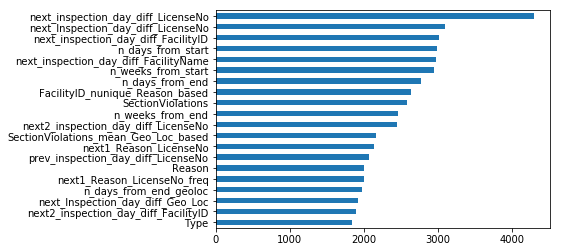

In [70]:
fi = pd.Series(index=features, data = clf.feature_importances_)
fi.sort_values(ascending=False)[:20][::-1].plot.barh()

In [71]:
predictions_test_lgb = clf.predict_proba(X_test)

In [72]:

target_mapper = {0:'FACILITY CHANGED',
1:'FAIL',
2:'FURTHER INSPECTION REQUIRED',
3:'INSPECTION OVERRULED',
4:'PASS',
5:'PASS(CONDITIONAL)',
6:'SHUT-DOWN'}
sub_df = pd.DataFrame(predictions_test_lgb)
sub_df.columns = [target_mapper[c] for c in sub_df.columns]


In [73]:
sub_df.head(10)

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.000156,0.655819,0.003968,0.017689,0.143825,0.146872,0.031670
1,0.000071,0.032281,0.001772,0.006169,0.921178,0.024007,0.014523
2,0.000526,0.048626,0.004980,0.758820,0.117000,0.037323,0.032726
3,0.000432,0.071602,0.002801,0.012521,0.106194,0.034152,0.772298
4,0.000071,0.032214,0.001768,0.006128,0.920560,0.024774,0.014486
5,0.000420,0.112402,0.007744,0.019597,0.539960,0.162420,0.157458
6,0.000071,0.032271,0.001768,0.006127,0.921473,0.023802,0.014489
7,0.000080,0.032423,0.002038,0.006338,0.920023,0.024234,0.014865
8,0.000072,0.031034,0.001784,0.006720,0.920939,0.024945,0.014507
9,0.000082,0.033081,0.001853,0.006650,0.916617,0.026549,0.015168
